# Plot comparison 

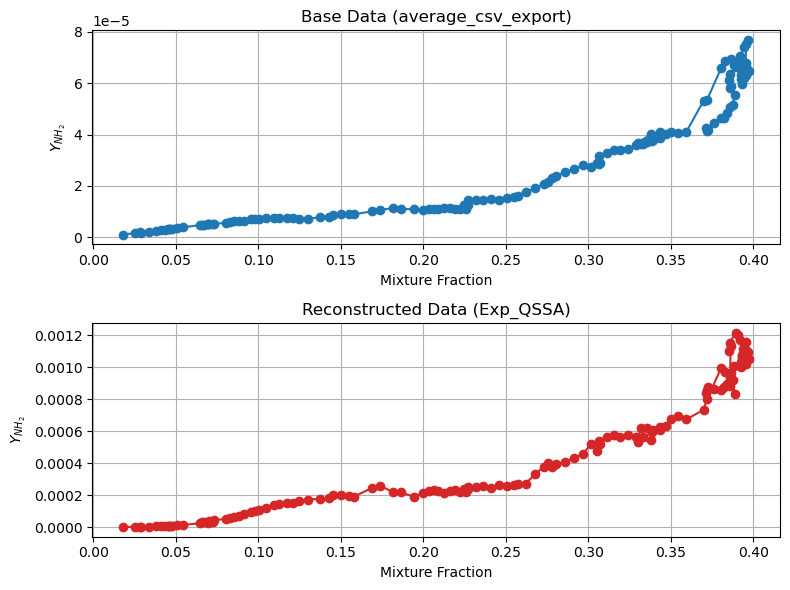

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# ---- Paths ----
# "Marshall_33s221r"
# "KAUST_32s243r"
recon_file = "cases/NH3_KAUST_DEF_1bar/exp_data/Exp_QSSA/KAUST_32s243r/F_mass_z30/predicted_X.csv"
base_file  = "cases/NH3_KAUST_DEF_1bar/exp_data/average_csv_export/F_mass_z30.csv"

# ---- Load Data ----
df_recon = pd.read_csv(recon_file)
df_base  = pd.read_csv(base_file)

# ---- Determine the correct columns ----
# (Support both 'NH2' or 'Y_NH2', and 'mixture_fraction' or 'Z')
def find_col(df, keys):
    for k in keys:
        if k in df.columns:
            return k
    raise KeyError(f"None of {keys} found in {list(df.columns)}")

col_phi  = find_col(df_recon, ["mixture_fraction", "Z"])
col_nh2  = find_col(df_recon, ["NH2", "Y_NH2"])
col_phi_b  = find_col(df_base, ["mixture_fraction", "Z"])
col_nh2_b  = find_col(df_base, ["NH2", "Y_NH2"])

# ---- Plot ----
plt.figure(figsize=(8, 6))

# Subplot 1: base
plt.subplot(2, 1, 1)
plt.plot(df_base[col_phi_b], df_base[col_nh2_b], "o-", color="tab:blue")
plt.xlabel("Mixture Fraction")
plt.ylabel("$Y_{NH_2}$")
plt.title("Base Data (average_csv_export)")
plt.grid(True)

# Subplot 2: reconstructed
plt.subplot(2, 1, 2)
plt.plot(df_recon[col_phi], df_recon[col_nh2], "o-", color="tab:red")
plt.xlabel("Mixture Fraction")
plt.ylabel("$Y_{NH_2}$")
plt.title("Reconstructed Data (Exp_QSSA)")
plt.grid(True)

plt.tight_layout()
plt.show()
